In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
marketing=pd.read_csv('/Users/nafisahasan/Documents/PYTHON Datasets/datacamp_marketing_dataset.csv')

In [3]:
#Examine data
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
marketing.shape

(10037, 12)

In [5]:
marketing.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [6]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [7]:
#Change date column datatypes from object to datetime by reading file again, in order to avoid redundancy from 
#individually converting each column's datatype
marketing=pd.read_csv('/Users/nafisahasan/Documents/PYTHON Datasets/datacamp_marketing_dataset.csv',parse_dates=
                     ['date_subscribed','date_canceled','date_served'])

In [8]:
#Check updated datatypes
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [9]:
#Add 3 new columns to dataset
#Create a dictionary and map values in subscribing_channel column to the dictionary
channel_dict={'House Ads':1,'Instagram':2,'Facebook':3,'Email':4,'Push':5}
marketing['channel_code']=marketing['subscribing_channel'].map(channel_dict)
#Add another column which states whether the user was shown the ad in their preferred language
marketing['correct_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],'Yes','No')
#Add a Day of Week column using date_subscribed data
marketing['DoW']=marketing['date_subscribed'].dt.dayofweek
#Check updated dataframe
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


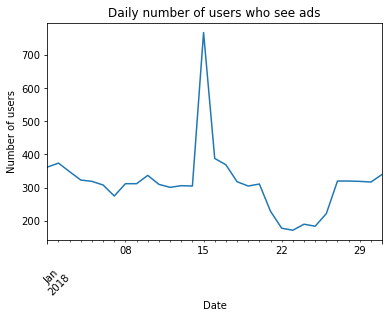

In [10]:
#Aggregate number of daily users that see ads
daily_users=marketing.groupby('date_served')['user_id'].nunique()
#Plot data
daily_users.plot()
#Annotate data
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

In [11]:
#Calculate conversion rate
marketing['converted']=marketing['converted'].astype('bool')
subscribers=marketing[marketing['converted']==True]['user_id'].nunique()
total=marketing['user_id'].nunique()
conv_rate=subscribers/total
print('Conversion Rate: '+ str(round(conv_rate*100,2))+'%')

#Calculate retention rate
#Create new is_retained_actual column because is_retained column is wrong-> True indicates is not retained and False
#indicates retained
marketing['is_retained']=marketing['is_retained'].astype('bool')
marketing['is_retained_actual']=np.where(marketing['is_retained']==True,False,True)
retained=marketing[marketing['is_retained_actual']==True]['user_id'].nunique()
retention=retained/subscribers
print('Rentention Rate: '+str(round(retention*100,2))+'%')

Conversion Rate: 14.09%
Rentention Rate: 33.98%


In [12]:
#Customer segmentation by subscribing channel
converted=marketing[marketing['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
subscribers=marketing.groupby('subscribing_channel')['user_id'].nunique()
sub_channel_conversion=round((converted/subscribers)*100,2)
print(sub_channel_conversion)

subscribing_channel
Email         83.85
Facebook     100.00
House Ads    100.00
Instagram    100.00
Push         100.00
Name: user_id, dtype: float64


In [13]:
#Check to see if the above calculations are accurate
print(marketing.groupby('subscribing_channel')['user_id'].nunique())
print(marketing[marketing['converted']==True].groupby('subscribing_channel')['user_id'].nunique())

subscribing_channel
Email        192
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64
subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


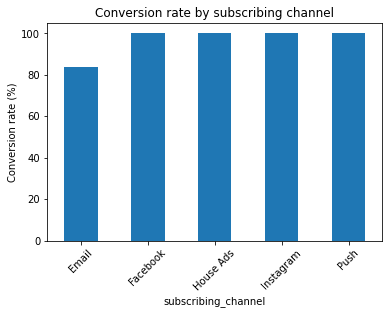

In [14]:
#Visually comparing marketing channel conversion rates 
sub_channel_conversion.plot(kind="bar")
plt.title('Conversion rate by subscribing channel')
plt.ylabel('Conversion rate (%)')
plt.xticks(rotation=45)
plt.show()

subscribing_channel
Email        0.322981
Facebook     0.316742
House Ads    0.419463
Instagram    0.340517
Push         0.311688
Name: user_id, dtype: float64


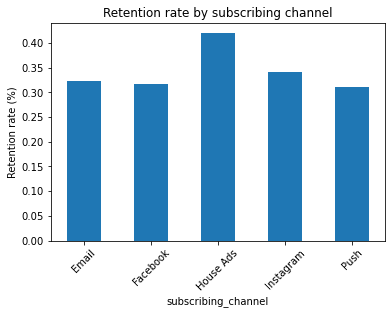

In [15]:
#Calculate and plot retention rate by subscribing channel
retained_sub_channel=marketing[marketing['is_retained_actual']==True].groupby('subscribing_channel')['user_id'].nunique()
conv_sub_channel=marketing[marketing['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
retention_sub_channel=retained_sub_channel/conv_sub_channel
print(retention_sub_channel)
retention_sub_channel.plot(kind="bar")
plt.title('Retention rate by subscribing channel')
plt.ylabel('Retention rate (%)')
plt.xticks(rotation=45)
plt.show()

   date_subscribed  retention_rate
0       2018-01-01        0.222222
1       2018-01-02        0.297297
2       2018-01-03        0.270270
3       2018-01-04        0.500000
4       2018-01-05        0.425000
5       2018-01-06        0.243243
6       2018-01-07        0.473684
7       2018-01-08        0.361111
8       2018-01-09        0.325000
9       2018-01-10        0.317073
10      2018-01-11        0.384615
11      2018-01-12        0.608696
12      2018-01-13        0.500000
13      2018-01-14        0.384615
14      2018-01-15        0.285714
15      2018-01-16        0.298077
16      2018-01-17        0.383721
17      2018-01-18        0.266667
18      2018-01-19        0.315789
19      2018-01-20        0.190476
20      2018-01-21        0.238095
21      2018-01-22        0.227273
22      2018-01-23        0.285714
23      2018-01-24        0.347826
24      2018-01-25        0.434783
25      2018-01-26        0.200000
26      2018-01-27        0.428571
27      2018-01-28  

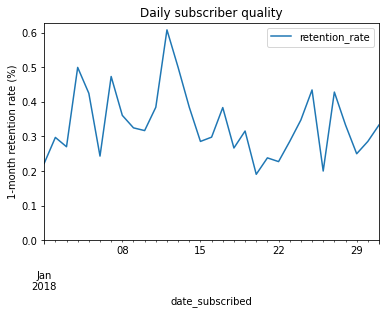

In [16]:
#Calculate and plot daily retention rate by date subscribed
total=marketing.groupby('date_subscribed')['user_id'].nunique()
retained=marketing[marketing['is_retained_actual']==True].groupby('date_subscribed')['user_id'].nunique()
daily_retention_rate=retained/total
daily_retention_rate=pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns=['date_subscribed','retention_rate']
print(daily_retention_rate)
daily_retention_rate.plot('date_subscribed','retention_rate')
plt.title('Daily subscriber quality')
plt.ylabel('1-month retention rate (%)')
plt.ylim(0)
plt.show()

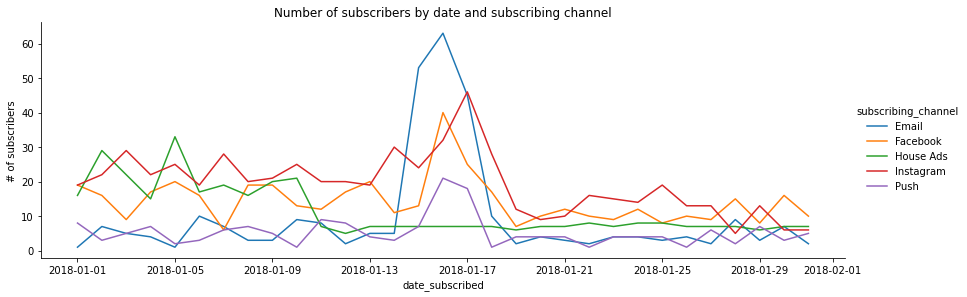

In [17]:
#Plot daily retention rate by subscribing channel
sub_by_channel=marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].count()
sub_by_channel=pd.DataFrame(sub_by_channel)
sns.relplot(x="date_subscribed",y="user_id",data=sub_by_channel,hue="subscribing_channel",kind="line",height=4,
            aspect=3)
plt.ylabel('# of subscribers')
plt.title('Number of subscribers by date and subscribing channel')
plt.show()

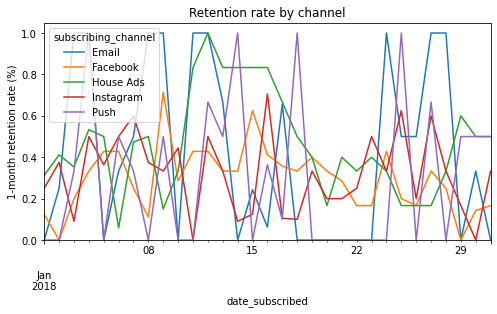

In [18]:
#Plot daily retention rate by subscribing channel
converted=marketing[marketing['converted']==True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
retained=marketing[marketing['is_retained_actual']==True].groupby(['date_subscribed','subscribing_channel'])\
        ['user_id'].nunique()
daily_retention_rate=retained/converted
daily_retention_rate=pd.DataFrame(daily_retention_rate.unstack(level=1))
daily_retention_rate=daily_retention_rate.fillna(0)
daily_retention_rate.plot(figsize=(8,4))
plt.title('Retention rate by channel')
plt.ylabel('1-month retention rate (%)')
plt.ylim(0)
plt.show()

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


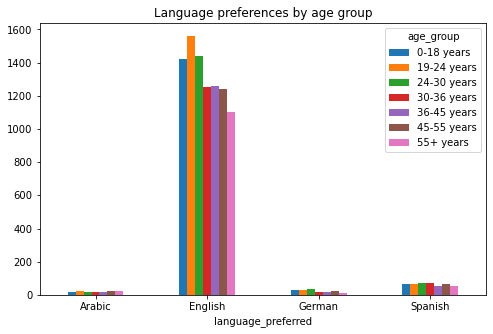

In [19]:
#Plot number of subscribers by language preferred and age group
sub_by_lang=marketing.groupby(['language_preferred','age_group'])['user_id'].count()
sub_by_lang=pd.DataFrame(sub_by_lang.unstack(level=1))
print(sub_by_lang)
sub_by_lang.plot(kind="bar",figsize=(8,5))
plt.title('Language preferences by age group')
plt.xticks(rotation=0)
plt.show()

In [20]:
#Build retention function to automate analysis
def retention_rate(dataframe,column_names):
    converted=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    retained=dataframe[dataframe['is_retained_actual']==True].groupby(column_names)['user_id'].nunique()
    retention_rate=retained/converted
    retention_rate=retention_rate.fillna(0)
    return retention_rate

#Use function
date_channel_ret=retention_rate(marketing,['date_served','marketing_channel'])

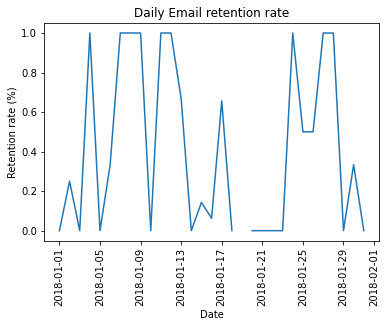

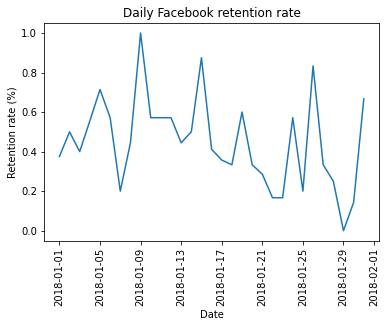

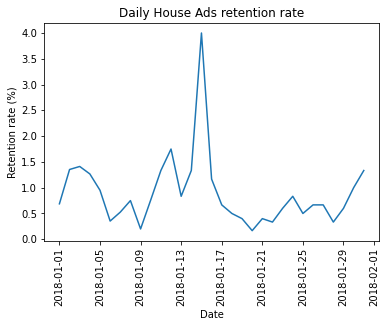

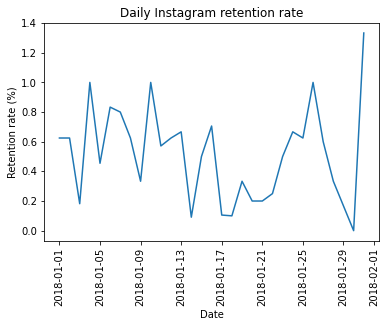

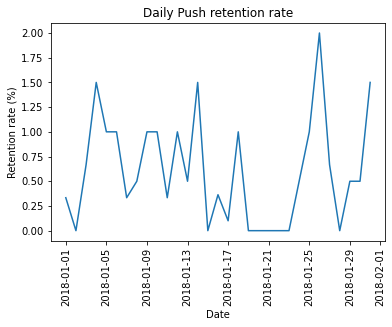

In [21]:
#Build function to automate plotting to calculate retention
def plot_retention(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index,dataframe[column])
        plt.title('Daily '+ column+' retention rate' )
        plt.ylabel('Retention rate (%)')
        plt.xlabel('Date')
        plt.xticks(rotation=90)
        plt.show()
#Use function
date_channel_df=pd.DataFrame(date_channel_ret.unstack(level=1))
plot_retention(date_channel_df)

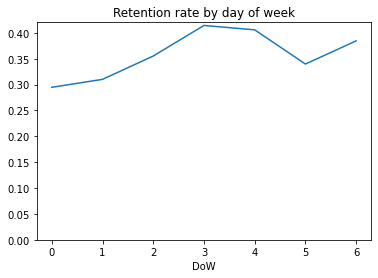

In [22]:
#Day of Week trends
dow_retention=retention_rate(marketing,['DoW'])
dow_retention.plot()
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

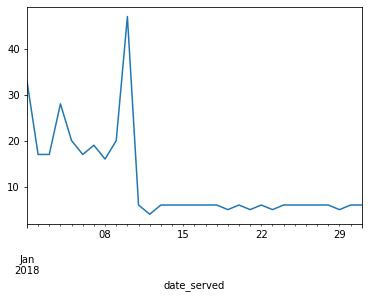

In [23]:
#What led to the sudden decline of house ads?
house_ads_date_sub=marketing[marketing['subscribing_channel']=='House Ads'].groupby('date_served')['user_id'].nunique()
house_ads_date_sub.plot()
#Why did the number of users subscribing to house ads significantly decrease?
house_ads=marketing[marketing['subscribing_channel']=='House Ads']

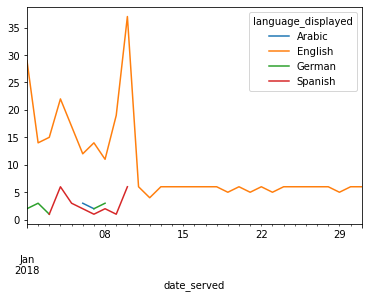

In [24]:
#Look at house ads by language displayed to see if there is any fluctuation 
house_ads_lang=house_ads.groupby(['date_served','language_displayed'])['user_id'].nunique()
house_ads_lang_df=pd.DataFrame(house_ads_lang.unstack(level=1))
house_ads_lang_df.plot()
plt.show()

<AxesSubplot:xlabel='date_served'>

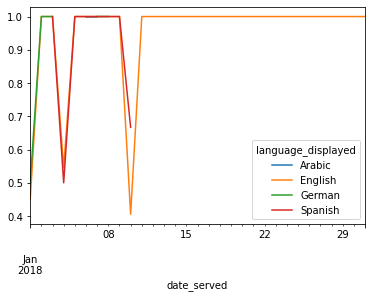

In [25]:
#We now know that language displayed in languages, other than English, stopped around the 10th
#Let's look at conversion rates as well
def conversion_rate(dataframe,column_names):
    converted=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    total=dataframe.groupby(column_names)['user_id'].nunique()
    conversion=converted/total
    conversion=conversion.fillna(0)
    return conversion

a=conversion_rate(house_ads,['date_served','language_displayed'])
calc_df=pd.DataFrame(a.unstack(level=1))
calc_df.plot()

In [26]:
#We can infer that there may have been a new marketing campaign, which was only displayed in English, leading to
#no subscribers and low conversion rates in other languages. Let's check to see if the campaign was displayed
#in user's preferred language
house_ads['correct_lang']=np.where(house_ads['language_displayed']==house_ads['language_preferred'],'Yes','No')
print(house_ads)

        user_id date_served marketing_channel          variant  converted  \
0    a100000029  2018-01-01         House Ads  personalization       True   
1    a100000030  2018-01-01         House Ads  personalization       True   
2    a100000031  2018-01-01         House Ads  personalization       True   
3    a100000032  2018-01-01         House Ads  personalization       True   
4    a100000033  2018-01-01         House Ads  personalization       True   
..          ...         ...               ...              ...        ...   
349  a100000514  2018-01-26         House Ads  personalization       True   
350  a100000515  2018-01-27         House Ads  personalization       True   
351  a100000523  2018-01-28         House Ads  personalization       True   
352  a100000524  2018-01-30         House Ads  personalization       True   
353  a100000525  2018-01-31         House Ads  personalization       True   

    language_displayed language_preferred    age_group date_subscribed  \
0

/var/folders/rs/fy3t31_91xjd_1cswqnynyxr0000gn/T/ipykernel_3364/4113647825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['correct_lang']=np.where(house_ads['language_displayed']==house_ads['language_preferred'],'Yes','No')


In [27]:
#Calculate percentage of users who weren't being served ads in the right language

In [28]:
lang_check=house_ads.groupby(['date_served','correct_lang'])['user_id'].count()
lang_check_df=pd.DataFrame(lang_check.unstack(level=1)).fillna(0)
print(lang_check_df)

correct_lang   No   Yes
date_served            
2018-01-01    0.0  33.0
2018-01-02    0.0  17.0
2018-01-03    0.0  17.0
2018-01-04    0.0  28.0
2018-01-05    0.0  20.0
2018-01-06    0.0  17.0
2018-01-07    0.0  19.0
2018-01-08    0.0  16.0
2018-01-09    0.0  20.0
2018-01-10    0.0  47.0
2018-01-11    0.0   6.0
2018-01-12    1.0   3.0
2018-01-13    1.0   5.0
2018-01-14    0.0   6.0
2018-01-15    0.0   6.0
2018-01-16    0.0   6.0
2018-01-17    4.0   2.0
2018-01-18    1.0   5.0
2018-01-19    1.0   4.0
2018-01-20    2.0   4.0
2018-01-21    0.0   5.0
2018-01-22    2.0   4.0
2018-01-23    0.0   5.0
2018-01-24    0.0   6.0
2018-01-25    2.0   4.0
2018-01-26    2.0   4.0
2018-01-27    2.0   4.0
2018-01-28    2.0   4.0
2018-01-29    2.0   3.0
2018-01-30    2.0   4.0
2018-01-31    2.0   4.0


correct_lang   No   Yes  corr_pct
date_served                      
2018-01-01    0.0  33.0  1.000000
2018-01-02    0.0  17.0  1.000000
2018-01-03    0.0  17.0  1.000000
2018-01-04    0.0  28.0  1.000000
2018-01-05    0.0  20.0  1.000000
2018-01-06    0.0  17.0  1.000000
2018-01-07    0.0  19.0  1.000000
2018-01-08    0.0  16.0  1.000000
2018-01-09    0.0  20.0  1.000000
2018-01-10    0.0  47.0  1.000000
2018-01-11    0.0   6.0  1.000000
2018-01-12    1.0   3.0  0.750000
2018-01-13    1.0   5.0  0.833333
2018-01-14    0.0   6.0  1.000000
2018-01-15    0.0   6.0  1.000000
2018-01-16    0.0   6.0  1.000000
2018-01-17    4.0   2.0  0.333333
2018-01-18    1.0   5.0  0.833333
2018-01-19    1.0   4.0  0.800000
2018-01-20    2.0   4.0  0.666667
2018-01-21    0.0   5.0  1.000000
2018-01-22    2.0   4.0  0.666667
2018-01-23    0.0   5.0  1.000000
2018-01-24    0.0   6.0  1.000000
2018-01-25    2.0   4.0  0.666667
2018-01-26    2.0   4.0  0.666667
2018-01-27    2.0   4.0  0.666667
2018-01-28    

(array([17532., 17536., 17540., 17544., 17548., 17552., 17556., 17560.,
        17563.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

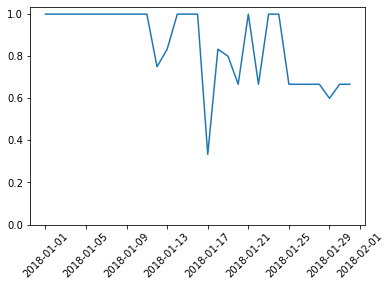

In [29]:
#Divide count of correct language by row sum
lang_check_df['corr_pct']= lang_check_df['Yes']/lang_check_df.sum(axis=1)
print(lang_check_df)
plt.plot(lang_check_df.index,lang_check_df['corr_pct'])
plt.ylim(0)
plt.xticks(rotation=45)

In [30]:
#Resolve the possible bug in the campaign
#Create dataframe of house ads before January 11, since this is the date from when there were no subscribers in 
#languages other than English
house_ads_no_bug=house_ads[house_ads['date_served']<'2018-01-11']
lang_conv=conversion_rate(house_ads_no_bug,'language_displayed')
print(lang_conv)

language_displayed
Arabic     1.000000
English    0.865854
German     0.857143
Spanish    0.894737
Name: user_id, dtype: float64


In [31]:
#Calculate other language conversion rates against English
spanish_conv=lang_conv['Spanish']/lang_conv['English']
arabic_conv=lang_conv['Arabic']/lang_conv['English']
german_conv=lang_conv['German']/lang_conv['English']
#Create conversion dataframe
lang_conversion=house_ads.groupby(['date_served','language_preferred']).agg({'user_id':'nunique','converted':'sum'})
lang_conv_df=pd.DataFrame(lang_conversion.unstack(level=1)).fillna(0)
print(lang_conv_df)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0    29.0    2.0     0.0       2.0    13.0    1.0   
2018-01-02             0.0    14.0    3.0     0.0       0.0    14.0    3.0   
2018-01-03             0.0    15.0    1.0     1.0       0.0    15.0    1.0   
2018-01-04             0.0    22.0    0.0     6.0       0.0    12.0    0.0   
2018-01-05             0.0    17.0    0.0     3.0       0.0    17.0    0.0   
2018-01-06             3.0    12.0    0.0     2.0       3.0    12.0    0.0   
2018-01-07             2.0    14.0    2.0     1.0       2.0    14.0    2.0   
2018-01-08             0.0    11.0    3.0     2.0       0.0    11.0    3.0   
2018-01-09             0.0    19.0    0.0     1.0       0.0    19.0    0.0   
2018-01-10             0.0    37.0    4.0     6.0       0.0    1

In [32]:
#Create English conversion rate column for affected period
lang_conv_df['english_conv']=lang_conv_df.loc['2018-01-11':'2018-01-31',('converted','English')]
print(lang_conv_df)

                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0    29.0    2.0     0.0       2.0    13.0    1.0   
2018-01-02             0.0    14.0    3.0     0.0       0.0    14.0    3.0   
2018-01-03             0.0    15.0    1.0     1.0       0.0    15.0    1.0   
2018-01-04             0.0    22.0    0.0     6.0       0.0    12.0    0.0   
2018-01-05             0.0    17.0    0.0     3.0       0.0    17.0    0.0   
2018-01-06             3.0    12.0    0.0     2.0       3.0    12.0    0.0   
2018-01-07             2.0    14.0    2.0     1.0       2.0    14.0    2.0   
2018-01-08             0.0    11.0    3.0     2.0       0.0    11.0    3.0   
2018-01-09             0.0    19.0    0.0     1.0       0.0    19.0    0.0   
2018-01-10             0.0    37.0    4.0     6.0       0.0    1

In [33]:
#Calculate daily expected conversion rate (if there were no bugs)
lang_conv_df['exp_spanish_rate']=lang_conv_df['english_conv']*spanish_conv
lang_conv_df['exp_arabic_rate']=lang_conv_df['english_conv']*arabic_conv
lang_conv_df['exp_german_rate']=lang_conv_df['english_conv']*german_conv

In [34]:
#Calculate daily expected conversion 
lang_conv_df['exp_spanish_conv']=lang_conv_df['exp_spanish_rate']/100*lang_conv_df[('user_id','Spanish')]
lang_conv_df['exp_arabic_conv']=lang_conv_df['exp_arabic_rate']/100*lang_conv_df[('user_id','Arabic')]
lang_conv_df['exp_german_conv']=lang_conv_df['exp_german_rate']/100*lang_conv_df[('user_id','German')]

In [35]:
#Calculate expected subscribers for each language
bug_period=lang_conv_df.loc['2018-01-11':'2018-01-31']
expected_subs=bug_period['exp_spanish_rate'].agg('sum')+bug_period['exp_arabic_rate'].agg('sum')+\
                bug_period['exp_german_rate'].agg('sum')
print(expected_subs)

298.7533622789368


In [36]:
#Calculate how many subscribers we actually got
actual_subs=bug_period[('converted','Spanish')].sum()+bug_period[('converted','Arabic')].sum()+\
            bug_period[('converted','German')].sum()
print(actual_subs)

26.0


In [37]:
lost_subs=expected_subs-actual_subs
print(lost_subs)

272.7533622789368


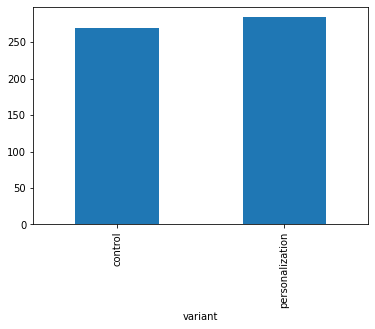

In [39]:
email=marketing[marketing['marketing_channel']=='Email']
allocation=email.groupby(['variant'])['user_id'].nunique()
allocation.plot(kind="bar")
plt.show()

In [48]:
#Group by user id and variant
#Find where user is converted (converted.max())
subscribers=email.groupby(['user_id','variant'])['converted'].max()
subscribers=pd.DataFrame(subscribers.unstack(level=1))
control=subscribers['control'].dropna()
personalization=subscribers['personalization'].dropna()
print(subscribers)
print('control conversion rate: ',(np.mean(control)))
print('personalization conversion rate: ',(np.mean(personalization)))

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True
...            ...             ...
a100007288    True             NaN
a100007289    True             NaN
a100007290    True             NaN
a100007291    True             NaN
a100007293    True             NaN

[553 rows x 2 columns]
control conversion rate:  0.2814814814814815
personalization conversion rate:  0.3908450704225352


In [51]:
#Calculate lift
#lift is treatment performance compared to the control
lift=(np.mean(personalization)-np.mean(control))/np.mean(control)
print('lift: ',round(lift*100,2),'%')

lift:  38.85 %


In [61]:
#Create lift function to automate analysis
def lift(a,b):
    lift=(np.mean(b)-np.mean(a))/np.mean(a)
    return str(round(lift*100,2)) + '%'

In [62]:
t=ttest_ind(control,personalization)
print(t)

Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524)


In [63]:
#Personalization test segmented by language
for language in np.unique(marketing['language_displayed'].values):
    print(language)
    
    language_data=marketing[(marketing['marketing_channel']=='Email') & (marketing['language_displayed']==language)]
    subscribers=language_data.groupby(['user_id','variant'])['converted'].max()
    subscribers=pd.DataFrame(subscribers.unstack(level=1))
    control=subscribers['control'].dropna()
    personalization=subscribers['personalization'].dropna()
    print('lift: ',lift(control,personalization))
    print('t-statistic: ',ttest_ind(control,personalization))

Arabic
lift:  50.0%
t-statistic:  Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001)
English
lift:  39.0%
t-statistic:  Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815)
German
lift:  -1.62%
t-statistic:  Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678)
Spanish
lift:  166.67%
t-statistic:  Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524)
